## Jupyter Notebook : Text Clustering - flair

#### - Adirtha Borgohain

In [1]:
## Importing all necessary libraries and modules
import math
import string
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
# from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction import text
from sklearn.metrics import silhouette_score
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from flair.embeddings import FlairEmbeddings, Sentence, DocumentPoolEmbeddings
%matplotlib inline

In [2]:
flair_embed = FlairEmbeddings('news-forward')
document_embeddings = DocumentPoolEmbeddings([flair_embed])

In [3]:
DATA_DIR = './'
FILE_NAME = 'text_to_cluster.txt'
delimiter = '\n'

In [4]:
## Reading the data file
df = pd.read_csv(DATA_DIR + FILE_NAME, delimiter=delimiter, header=None, names=["Headlines"])
df.head()

,Headlines
0,Ransomware attack at Mexico's Pemex halts work...
1,#city | #ransomware | Ransomware Attack At Mex...
2,"Mexico's Pemex Oil Suffers Ransomware Attack, ..."
3,A Mexican oil company was hit by ransomware at...
4,Pemex Struck by Ransomware Attack


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 1 columns):
Headlines    684 non-null object
dtypes: object(1)
memory usage: 5.5+ KB


In [6]:
## Removing all duplicate headlines and resetting the index
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True)

,Headlines
0,Ransomware attack at Mexico's Pemex halts work...
1,#city | #ransomware | Ransomware Attack At Mex...
2,"Mexico's Pemex Oil Suffers Ransomware Attack, ..."
3,A Mexican oil company was hit by ransomware at...
4,Pemex Struck by Ransomware Attack
...,...
326,Tips for Staying Safe Online
327,Stand up to Cyber Attacks with Cloud Backups
328,"As cloud security improves, a weak link emerge..."
329,Cisco released new patches to fix security bugs


In [7]:
## Initially setting a range of clusters to be evaluated from
min_clusters = 10
max_clusters = math.floor(math.sqrt(df.shape[0])) + 10

In [8]:
## Cleaning the text in headlines
lemma = WordNetLemmatizer()
stop_words = text.ENGLISH_STOP_WORDS
filter_text = string.punctuation + '“”|”' + string.digits

df['Filter_Headlines'] = df['Headlines'].apply(lambda x: x.lower())
df['Filter_Headlines'] = df['Filter_Headlines'].apply(lambda x: x.translate(str.maketrans(filter_text,' '*len(filter_text),'')))
df['Filter_Headlines'] = df['Filter_Headlines'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop_words))
df['Filter_Headlines'] = df['Filter_Headlines'].apply(lambda x: "".join([lemma.lemmatize(word) for word in x]))
df['Filter_Headlines'] = df['Filter_Headlines'].replace('\s+[a-zA-Z]\s+', ' ', regex=True)

In [11]:
df_list = df['Filter_Headlines'].values

In [12]:
X = []
# create an example sentence
for x in df_list:
    sentence = Sentence(x)

# embed the sentence with our document embedding
    document_embeddings.embed(sentence)

# now check out the embedded sentence.
    X.append(sentence.get_embedding().detach().numpy())

For n_clusters = 10, silhouette score is 0.05592195317149162
For n_clusters = 11, silhouette score is 0.061610933393239975
For n_clusters = 12, silhouette score is 0.06672552973031998
For n_clusters = 13, silhouette score is 0.04891018569469452
For n_clusters = 14, silhouette score is 0.05447032302618027
For n_clusters = 15, silhouette score is 0.05241939797997475
For n_clusters = 16, silhouette score is 0.04627124220132828
For n_clusters = 17, silhouette score is 0.04707888513803482
For n_clusters = 18, silhouette score is 0.041985780000686646
For n_clusters = 19, silhouette score is 0.05955512449145317
For n_clusters = 20, silhouette score is 0.045195117592811584
For n_clusters = 21, silhouette score is 0.03410327434539795
For n_clusters = 22, silhouette score is 0.03809686750173569
For n_clusters = 23, silhouette score is 0.058338407427072525
For n_clusters = 24, silhouette score is 0.03787286952137947
For n_clusters = 25, silhouette score is 0.03923914581537247
For n_clusters = 26,

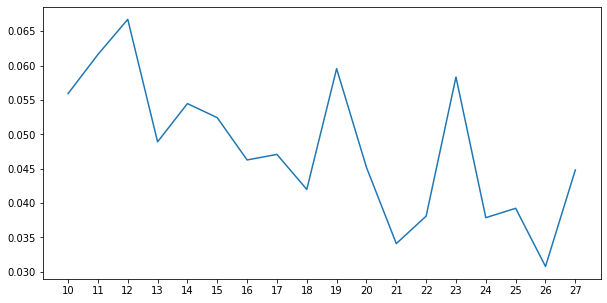

In [13]:
## Determing the silhoutte score for each possible value of K in [min_clusters, max_clusters)
score_list = []
n_cluster =  list(range(min_clusters, max_clusters))

for n_clusters in range(min_clusters, max_clusters):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score (X, preds, metric='euclidean')
    score_list.append(score)
    print(f"For n_clusters = { n_clusters }, silhouette score is { score }")
    
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(n_cluster, score_list)
plt.xticks(range(min_clusters,max_clusters))
plt.show()

In [14]:
## The KMeans algorithm is run on the dataset and the most common words for each cluster is printed out
kmeans = KMeans(n_clusters = 19, n_init = 10, n_jobs = 1) # n_init(number of iterations for clustering) n_jobs(number of cpu cores to use)
kmeans.fit(X)
## We look at the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]

In [15]:
## A dictionary is made wherein for each cluster keys, the index of rows belonging to it are stored as its values
cluster_dict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
cluster_dict

{0: array([ 19,  67, 100, 102, 198, 199, 213, 230, 231, 280, 287, 299]),
 1: array([  0,   1,   2,   4,   5,   7,  10,  20,  25,  27,  45,  54,  66,
         79,  82,  94,  95, 108, 124, 126, 144, 161, 173, 176, 197, 203,
        204, 205, 206, 208, 214, 215, 221, 251, 257, 261, 275, 303, 308,
        310, 328]),
 2: array([ 50, 111, 168, 268, 279, 290, 315, 316, 317, 329]),
 3: array([ 31, 112, 136, 137, 138, 152, 186, 187, 188, 189, 278, 318]),
 4: array([ 98, 133, 160, 192, 216, 220, 224, 232, 241, 252, 256, 309, 321]),
 5: array([ 92,  96,  99, 101, 103, 106, 125, 127, 128, 134, 139, 151, 159,
        166, 169, 217, 233, 236, 238, 245, 247, 265, 266, 269, 270, 276,
        289, 291, 304, 314, 323, 330]),
 6: array([ 53,  55,  56,  58,  59,  60,  61,  62,  64,  68,  69,  70,  71,
         72,  73,  74,  75,  76,  77,  78,  80,  81,  83,  84,  86,  90,
         91, 262, 263, 264]),
 7: array([  3,   6,   8,   9,  11, 141, 142, 143, 145, 146, 147, 165, 255]),
 8: array([113, 148, 154,

In [17]:
## A txt outfile file is created and the results are written to it as needed
output_file = open("output-flair-kmeans.txt","w") 

for key,value in cluster_dict.items():
    output_file.write('cluster id: ' + str(key) + '\n')
    for i in value:
        output_file.write(df['Headlines'].iloc[i] + '\n')
    output_file.write('*' * 100)
    output_file.write('\n')